In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
df = pd.read_csv("loan.csv")

In [19]:
# choose a col has not null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
ft1 = FunctionTransformer(func = np.log1p)
ft2 = FunctionTransformer(func = lambda x : x**2)

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,141.0,360.0,1.0,Urban,Y
1,LP001002,Male,No,0,Graduate,No,5849,0.0,141.0,360.0,1.0,Urban,Y
2,LP001002,Male,No,0,Graduate,No,5849,0.0,141.0,360.0,1.0,Urban,Y
3,LP001002,Male,No,0,Graduate,No,5849,0.0,141.0,360.0,1.0,Urban,Y
4,LP001002,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df["LoanAmount"] = df["LoanAmount"].ffill()

In [23]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df["log1p"]= ft1.fit_transform(df[["LoanAmount"]])
df["lambda"]= ft2.fit_transform(df[["LoanAmount"]])

In [26]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log1p,lambda
0,LP001002,Male,No,0,Graduate,No,5849,0.0,141.0,360.0,1.0,Urban,Y,4.955827,19881.0
1,LP001002,Male,No,0,Graduate,No,5849,0.0,141.0,360.0,1.0,Urban,Y,4.955827,19881.0
2,LP001002,Male,No,0,Graduate,No,5849,0.0,141.0,360.0,1.0,Urban,Y,4.955827,19881.0
3,LP001002,Male,No,0,Graduate,No,5849,0.0,141.0,360.0,1.0,Urban,Y,4.955827,19881.0
4,LP001002,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.955827,19881.0
5,LP001011,Male,Yes,0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,5.590987,71289.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,4.564348,9025.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5.068904,24964.0
8,LP001018,Male,Yes,0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5.129899,28224.0
9,LP001020,Male,Yes,0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,5.857933,121801.0


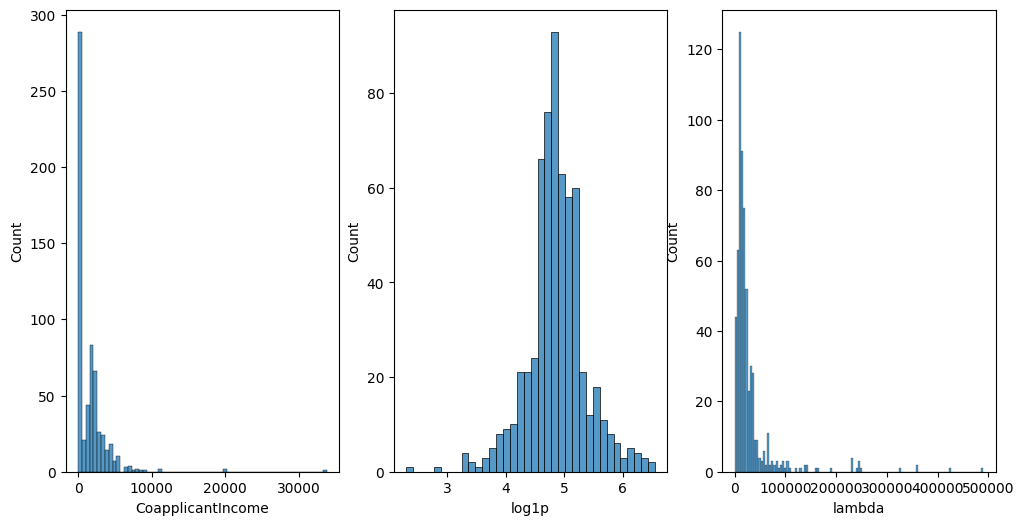

In [29]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
sns.histplot(x="CoapplicantIncome" , data = df)
plt.subplot(1,3,2)
sns.histplot(x="log1p" , data = df)
plt.subplot(1,3,3)
sns.histplot(x="lambda" , data = df)
plt.show()

# log1p data in normal distribution format and their are not outliers

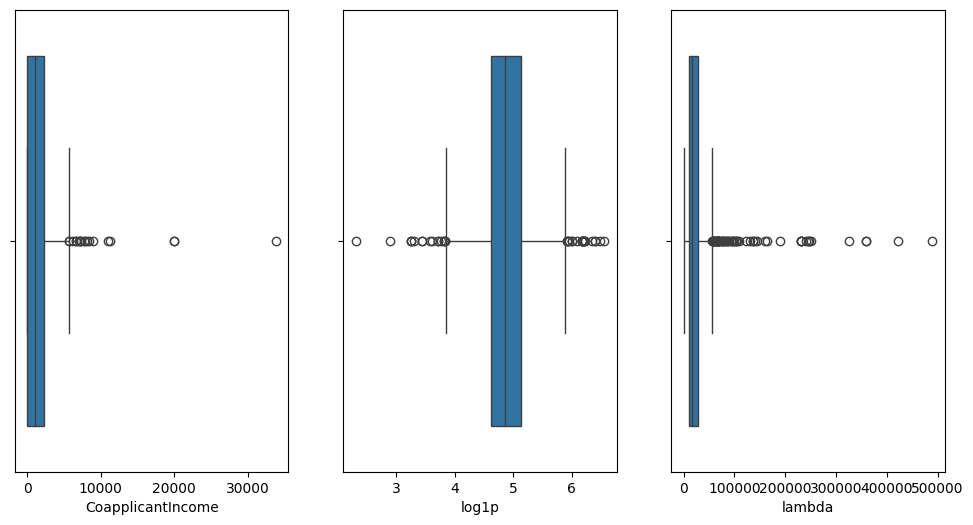

In [30]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
sns.boxplot(x="CoapplicantIncome" , data = df)
plt.subplot(1,3,2)
sns.boxplot(x="log1p" , data = df)
plt.subplot(1,3,3)
sns.boxplot(x="lambda" , data = df)
plt.show()